In [34]:
import re
import os
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  # Importing the stopwords module

from collections import Counter

import matplotlib.pyplot as plt


nltk.download('punkt')  # Download the necessary datasets
nltk.download('stopwords')
print(os.getcwd())

/Users/Everlie/Github/firstMachineLearning/IMDB


[nltk_data] Downloading package punkt to /Users/Everlie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Everlie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def process_text_files(folder_path):
    # Loop through all the items in the directory
    for file_name in os.listdir(folder_path):
        # Check for .txt files
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            # Open the text file
            with open(file_path, 'r') as file:
                text = file.read()
            # Convert text to lowercase
            text = text.lower()
            # Remove punctuation using str.translate
            text = text.translate(str.maketrans('', '', string.punctuation))
            # Write the modified text back to the file
            with open(file_path, 'w') as file:
                file.write(text)
            print(f"Processed file: {file_name}")




In [36]:
stop_words = set(stopwords.words('english')) | {'br'} | {'like'}  # Adding 'br' to stopwords and like

pos_word_counts = Counter()
neg_word_counts = Counter()

pos_directory = './aclImdb/train/pos'
neg_directory = './aclImdb/train/neg'

In [83]:
# Function to process each file
def process_file(filepath, word_counts):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        word_counts.update(filtered_tokens)
        
# Process all files in the positive directory
for filename in os.listdir(pos_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(pos_directory, filename)
        process_file(filepath, pos_word_counts)

# Process all files in the negative directory
for filename in os.listdir(neg_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(neg_directory, filename)
        process_file(filepath, neg_word_counts)


# Assuming 'pos_word_counts' and 'neg_word_counts' have been filled with word counts
# This will trim each Counter to only have the top 7000 words
# Trim pos_word_counts
pos_top_7000 = pos_word_counts.most_common(7000)
pos_word_counts = Counter(dict(pos_top_7000))

# Trim neg_word_counts
neg_top_7000 = neg_word_counts.most_common(7000)
neg_word_counts = Counter(dict(neg_top_7000))

In [82]:
print(neg_word_counts)

Counter({'movie': 47334, 'film': 35730, 'one': 24878, 'even': 15210, 'good': 14318, 'bad': 14164, 'would': 13692, 'really': 12426, 'time': 11562, 'see': 10756, 'dont': 10326, 'get': 9964, 'much': 9956, 'story': 9938, 'people': 9278, 'could': 9100, 'make': 9092, 'made': 8684, 'first': 8474, 'movies': 8262, 'plot': 7930, 'acting': 7866, 'way': 7616, 'well': 7608, 'characters': 7374, 'think': 7224, 'also': 7134, 'films': 6926, 'watch': 6920, 'know': 6534, 'character': 6498, 'better': 6466, 'never': 6454, 'seen': 6360, 'ever': 6340, 'little': 6136, 'two': 6084, 'say': 5894, 'nothing': 5854, 'im': 5812, 'many': 5788, 'something': 5648, 'end': 5620, 'thing': 5564, 'show': 5428, 'scenes': 5422, 'scene': 5410, 'didnt': 5320, 'go': 5242, 'doesnt': 5216, 'great': 5202, 'watching': 5182, 'worst': 4872, 'actually': 4862, 'actors': 4782, 'back': 4630, 'going': 4552, 'still': 4510, 'another': 4454, 'thats': 4450, 'cant': 4422, 'look': 4398, 'funny': 4398, 'man': 4384, 'life': 4354, 'want': 4266, 'pr

In [93]:
print(pos_word_counts)

Counter({'film': 58776, 'movie': 54420, 'one': 39207, 'good': 22188, 'story': 19458, 'great': 18879, 'time': 17997, 'see': 17535, 'well': 16704, 'also': 16518, 'really': 16350, 'would': 15867, 'even': 14694, 'first': 13860, 'much': 13818, 'people': 12936, 'films': 12792, 'get': 12690, 'best': 12666, 'love': 12444, 'way': 11631, 'life': 11436, 'many': 11238, 'movies': 10971, 'made': 10944, 'think': 10851, 'characters': 10809, 'two': 10806, 'seen': 10047, 'little': 9960, 'watch': 9951, 'dont': 9930, 'still': 9918, 'character': 9795, 'show': 9759, 'never': 9594, 'make': 9549, 'could': 9489, 'man': 9057, 'know': 8313, 'years': 8121, 'ever': 7902, 'end': 7653, 'scene': 7392, 'back': 7335, 'real': 7302, 'new': 7281, 'though': 7215, 'say': 7152, 'makes': 7149, 'go': 7110, 'acting': 7074, 'scenes': 7056, 'better': 6942, 'plot': 6930, 'young': 6927, 'us': 6801, 'find': 6765, 'work': 6627, 'world': 6612, 'quite': 6393, 'always': 6204, 'old': 6198, 'something': 6195, 'cast': 6195, 'lot': 6180, 'a

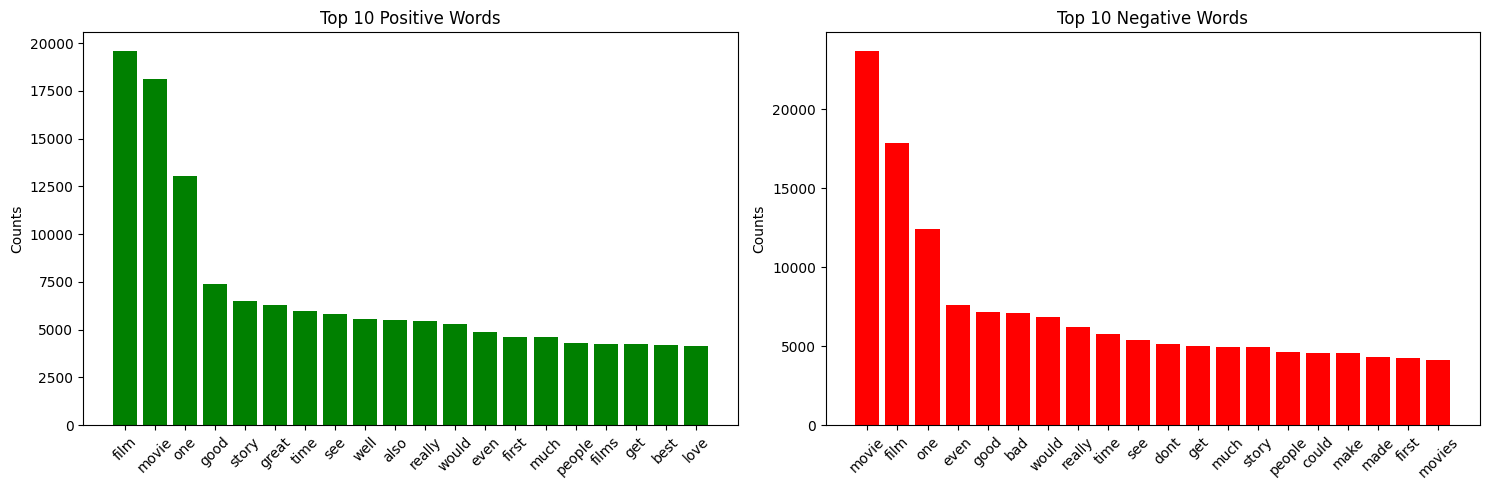

In [42]:
# Make a bar chart of common words
# Get the most common words
top_pos_words = pos_word_counts.most_common(20)
top_neg_words = neg_word_counts.most_common(20)

# Create lists of words and their counts
pos_words, pos_counts = zip(*top_pos_words)
neg_words, neg_counts = zip(*top_neg_words)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns for two bar charts

# Plot positive word counts
axs[0].bar(pos_words, pos_counts, color='green')
axs[0].set_title('Top 10 Positive Words')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=45)

# Plot negative word counts
axs[1].bar(neg_words, neg_counts, color='red')
axs[1].set_title('Top 10 Negative Words')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Top 3000 Most Common Words (minus the first 0 words)')

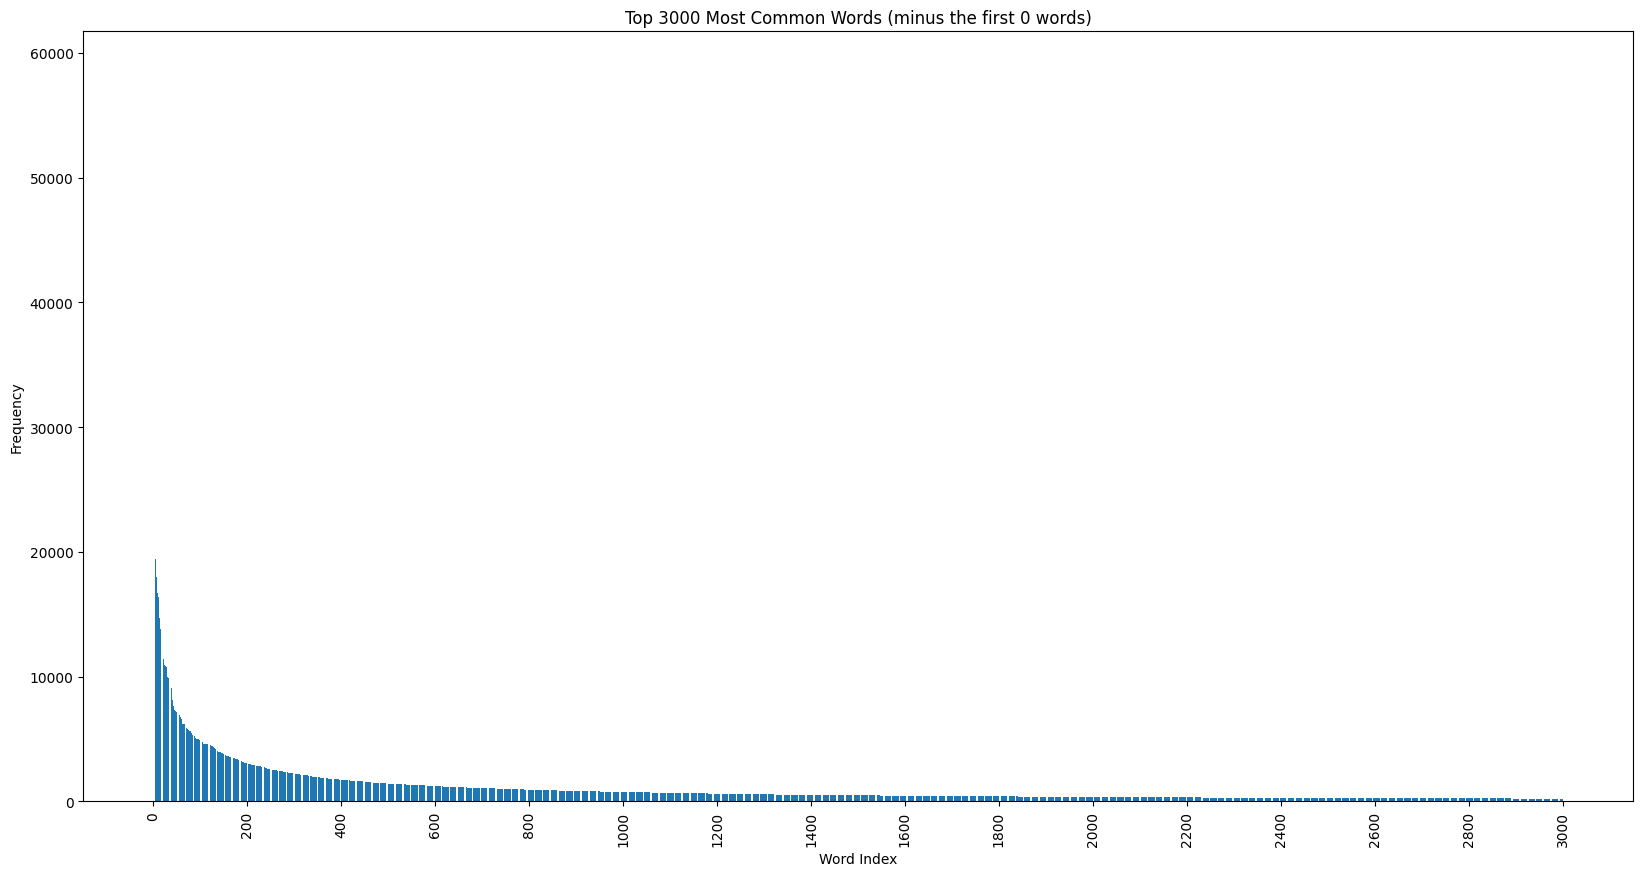

In [90]:
top_N = 3000  # The number of top words you want to show
exclude_first = 0  # The number of words to exclude from the start

# Get the most common words and their counts
top_words = pos_word_counts.most_common(top_N + exclude_first)[exclude_first:]
_, counts = zip(*top_words)  # We only need the counts, not the words themselves

# Create an index for each top word
indices = range(1, top_N + 1)

# Create the bar chart with a larger figure size
plt.figure(figsize=(20, 10))

# Plot the bars
plt.bar(indices, counts)

# Set ticks and labels
tick_interval = 200  # Adjust this value as needed
plt.xticks(range(0, top_N + 1, tick_interval), rotation='vertical')

# Set labels and title
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.title(f'Top {top_N} Most Common Words (minus the first {exclude_first} words)')